In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import APL1_functions as AC

In [2]:

# Aspect ratios at different alphas for targets at [10, 15, 20, 25, 30]
aspect_ratios_5e4 = [np.float64(0.09831616565112951), np.float64(0.10327121349007279), np.float64(0.10706065687504354), np.float64(0.11017255234169927), np.float64(0.11283746999727927)]
aspect_ratios_1e4 = [np.float64(0.0983113322886335), np.float64(0.10326955210011893), np.float64(0.10705984330745438), np.float64(0.11017208974059205), np.float64(0.11283714525084576)]
aspect_ratios_5e3 = [np.float64(0.09837673192155198), np.float64(0.10329059228112623), np.float64(0.10706972458054723), np.float64(0.11017786395168641), np.float64(0.11284107521918753)]
aspect_ratios_1e3 = [np.float64(0.09832232359412532), np.float64(0.10327331738297928), np.float64(0.10706164164920995), np.float64(0.1101731464252775), np.float64(0.11283786599310776)]

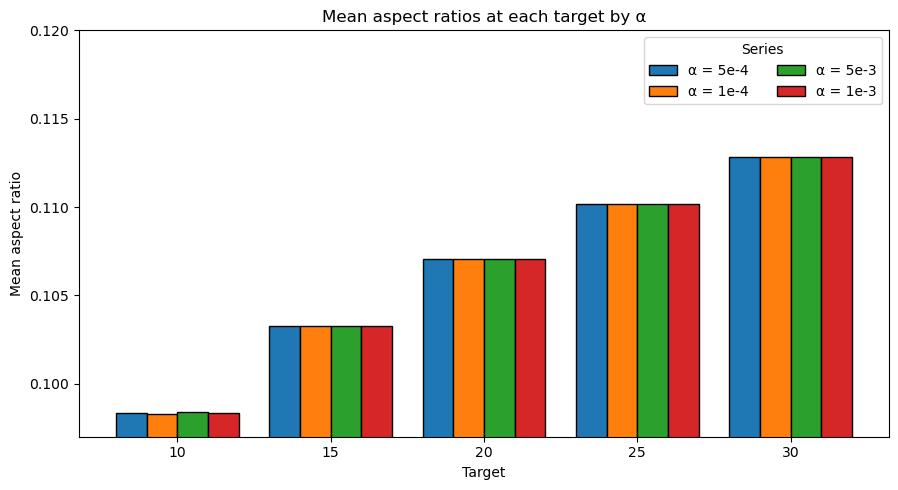

In [3]:


targets = np.array([10, 15, 20, 25, 30])
series = [
    (r'α = 5e-4', aspect_ratios_5e4),
    (r'α = 1e-4', aspect_ratios_1e4),
    (r'α = 5e-3', aspect_ratios_5e3),
    (r'α = 1e-3', aspect_ratios_1e3),
]

x = np.arange(len(targets))
n = len(series)
width = 0.8 / n  # total bar pack width ~0.8

plt.figure(figsize=(9,5))
for i, (label, vals) in enumerate(series):
    offset = (i - (n-1)/2) * width
    plt.bar(x + offset, vals, width=width, edgecolor='k', label=label)

plt.xticks(x, targets)
plt.xlabel('Target')
plt.ylabel('Mean aspect ratio')
plt.title('Mean aspect ratios at each target by α')
plt.legend(title='Series', ncol=2)
plt.tight_layout()
plt.ylim(.097,.12)
plt.show()


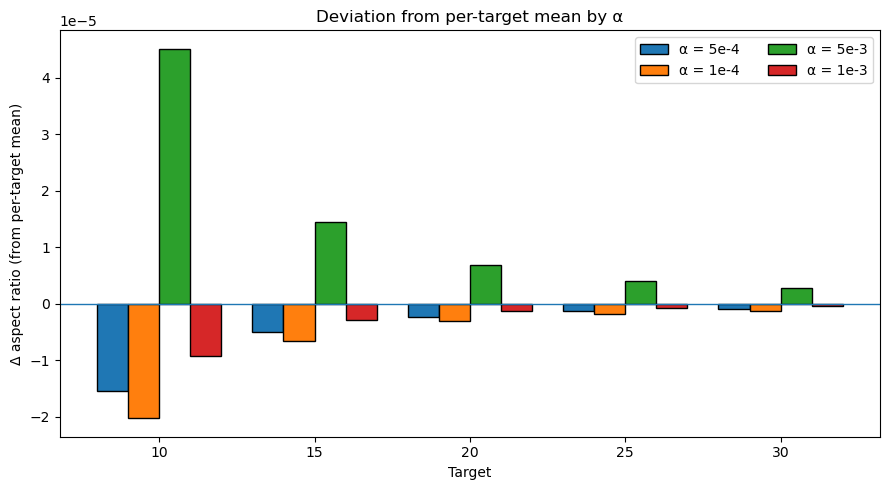

In [4]:
arr = np.vstack([s[1] for s in series])          # shape (4, 5)
grand_mean = arr.mean(axis=0, keepdims=True)     # per-target mean across α
deltas = arr - grand_mean                        # deviations

plt.figure(figsize=(9,5))
for i, (label, _) in enumerate(series):
    offset = (i - (n-1)/2) * width
    plt.bar(x + offset, deltas[i], width=width, edgecolor='k', label=label)
plt.axhline(0, linewidth=1)
plt.xticks(x, targets)
plt.xlabel('Target')
plt.ylabel('Δ aspect ratio (from per-target mean)')
plt.title('Deviation from per-target mean by α')
plt.legend(ncol=2)
plt.tight_layout()
plt.show()


In [5]:
aspect_ratio_5e4 = aspect_ratios_5e4[0]
aspect_ratio_1e4 = aspect_ratios_1e4[0]
aspect_ratio_5e3 = aspect_ratios_5e3[0]
aspect_ratio_1e3 = aspect_ratios_1e3[0]

print(aspect_ratio_5e4)
print(aspect_ratio_1e4)
print(aspect_ratio_5e3)
print(aspect_ratio_1e3)

0.09831616565112951
0.0983113322886335
0.09837673192155198
0.09832232359412532


Aspect Ratio:

$\frac{H}{r}$

Equation for Reynolds Number:

$\mathfrak{R}$ = $\alpha_\nu^{-1}*(\frac{r}{H})^{2}$


In [6]:
Reynolds_5e4 = (aspect_ratio_5e4**(-2)) / (5*10**(-4))
Reynolds_1e4 = (aspect_ratio_1e4**(-2)) / (1*10**(-4))
Reynolds_5e3 = (aspect_ratio_5e3**(-2)) / (5*10**(-3))
Reynolds_1e3 = (aspect_ratio_1e3**(-2)) / (1*10**(-3))


In [7]:
print(Reynolds_5e4)
print(Reynolds_1e4)
print(Reynolds_5e3)
print(Reynolds_1e3)

206909.35666626558
1034648.5104145535
20665.46649279972
103441.71997253466


In [8]:
df = pd.read_csv("C:\\Users\\casey\\UnigeMasters\\Astrophysics_Lab_Disc_Truncation\\Databases\\C1.csv", header=[0,1,2])

In [9]:
display(df['Circumprimary'])

0.1                    0.2                    0.3              \
           R     b     c          R     b     c          R     b     c   
0    10000.0 -0.66  0.84    10000.0 -0.72  0.88    10000.0 -0.76  0.92   
1   100000.0 -0.75  0.68   100000.0 -0.78  0.72   100000.0 -0.80  0.75   
2  1000000.0 -0.78  0.56  1000000.0 -0.80  0.60  1000000.0 -0.81  0.63   

         0.4                    0.5              
           R     b     c          R     b     c  
0    10000.0 -0.77  0.95    10000.0 -0.78  0.94  
1   100000.0 -0.81  0.78   100000.0 -0.81  0.78  
2  1000000.0 -0.82  0.66  1000000.0 -0.82  0.66

In [10]:

alpha = [5e-4, 1e-4, 5e-3, 1e-3]
aspect_ratio = [aspect_ratio_5e4, aspect_ratio_1e4, aspect_ratio_5e3, aspect_ratio_1e3]


Re = AC.Reynolds(alpha, aspect_ratio)

print(Re)


known_mu = [0.1, 0.2, 0.3, 0.4, 0.5]

b = []
c = []
R = df['Circumprimary']['0.1']['R']
for ii in range(len(known_mu)):
    bs = df['Circumprimary'][str(known_mu[ii])]['b']
    cs = df['Circumprimary'][str(known_mu[ii])]['c']
    b.append(bs)
    c.append(cs)
    


index = [0, 1, 2, 3, 4]
points = AC.make_pts(b, c, index[0])

print("matrix of points is: " + str(points))
print('')
print("row of points is: " + str(points[0]))
print('')
print("b is: " + str(points[0][0]))



[np.float64(206909.35666626558), np.float64(1034648.5104145535), np.float64(20665.46649279972), np.float64(103441.71997253466)]
matrix of points is: [[-6.6e-01  8.4e-01  1.0e+04]
 [-7.5e-01  6.8e-01  1.0e+05]
 [-7.8e-01  5.6e-01  1.0e+06]]

row of points is: [-6.6e-01  8.4e-01  1.0e+04]

b is: -0.66


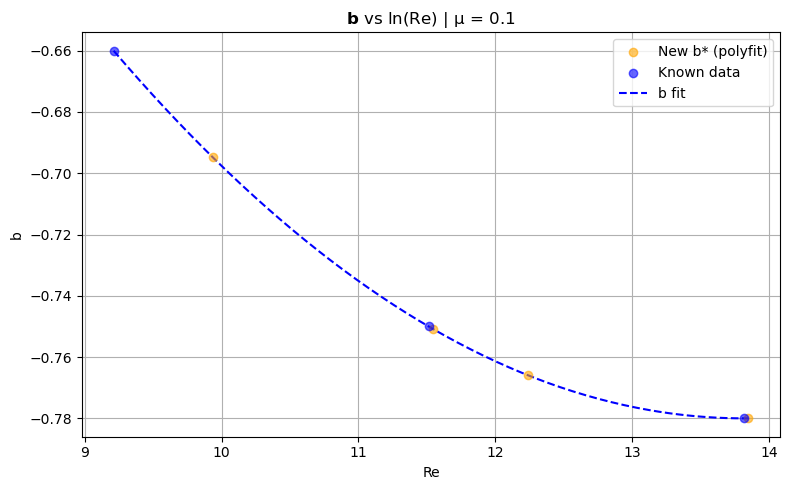

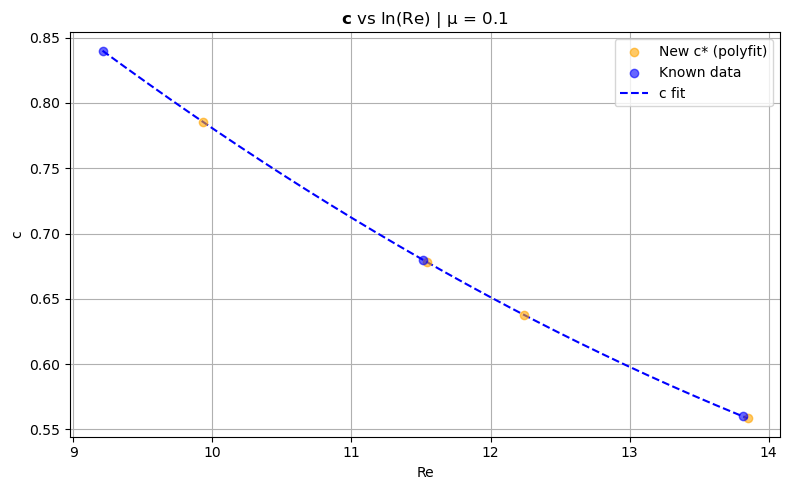

(['At μ_index=0 (μ≈0.1), Re=206909.35666626558: b = -0.7660 ± 0.0000', 'At μ_index=0 (μ≈0.1), Re=1034648.5104145535: b = -0.7800 ± 0.0000', 'At μ_index=0 (μ≈0.1), Re=20665.46649279972: b = -0.6948 ± 0.0000', 'At μ_index=0 (μ≈0.1), Re=103441.71997253466: b = -0.7509 ± 0.0000'], ['At μ_index=0 (μ≈0.1), Re=206909.35666626558: c = 0.6378 ± 0.0000', 'At μ_index=0 (μ≈0.1), Re=1034648.5104145535: c = 0.5585 ± 0.0000', 'At μ_index=0 (μ≈0.1), Re=20665.46649279972: c = 0.7852 ± 0.0000', 'At μ_index=0 (μ≈0.1), Re=103441.71997253466: c = 0.6779 ± 0.0000'])


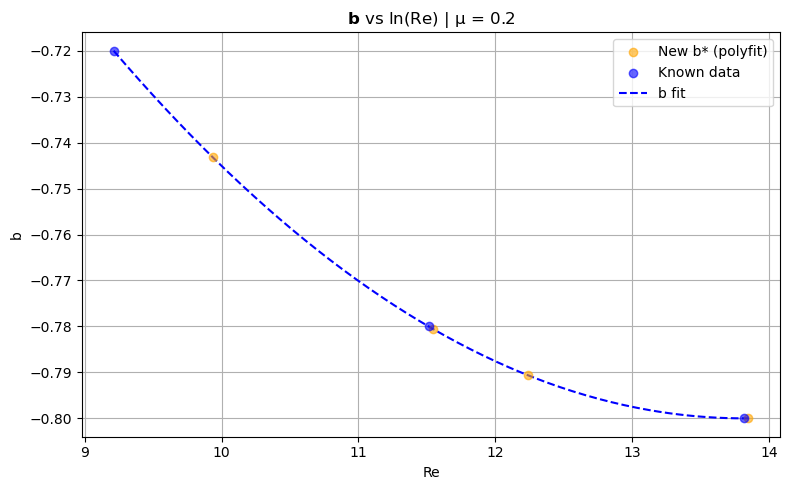

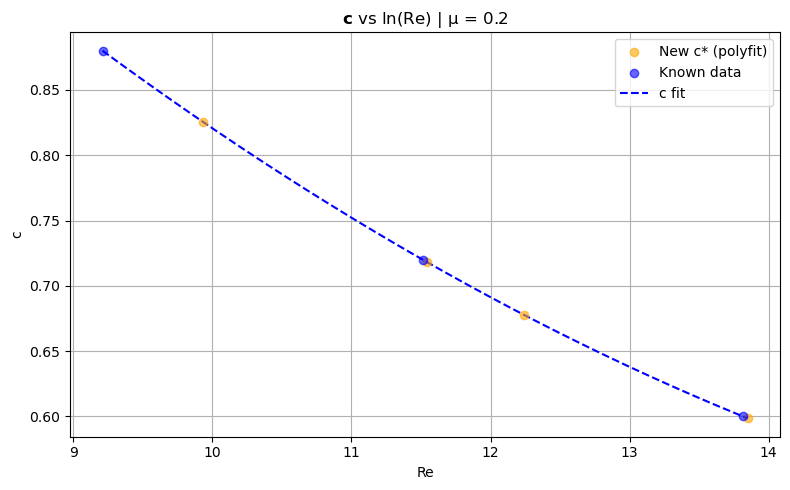

(['At μ_index=1 (μ≈0.2), Re=206909.35666626558: b = -0.7906 ± 0.0000', 'At μ_index=1 (μ≈0.2), Re=1034648.5104145535: b = -0.8000 ± 0.0000', 'At μ_index=1 (μ≈0.2), Re=20665.46649279972: b = -0.7432 ± 0.0000', 'At μ_index=1 (μ≈0.2), Re=103441.71997253466: b = -0.7806 ± 0.0000'], ['At μ_index=1 (μ≈0.2), Re=206909.35666626558: c = 0.6778 ± 0.0000', 'At μ_index=1 (μ≈0.2), Re=1034648.5104145535: c = 0.5985 ± 0.0000', 'At μ_index=1 (μ≈0.2), Re=20665.46649279972: c = 0.8252 ± 0.0000', 'At μ_index=1 (μ≈0.2), Re=103441.71997253466: c = 0.7179 ± 0.0000'])


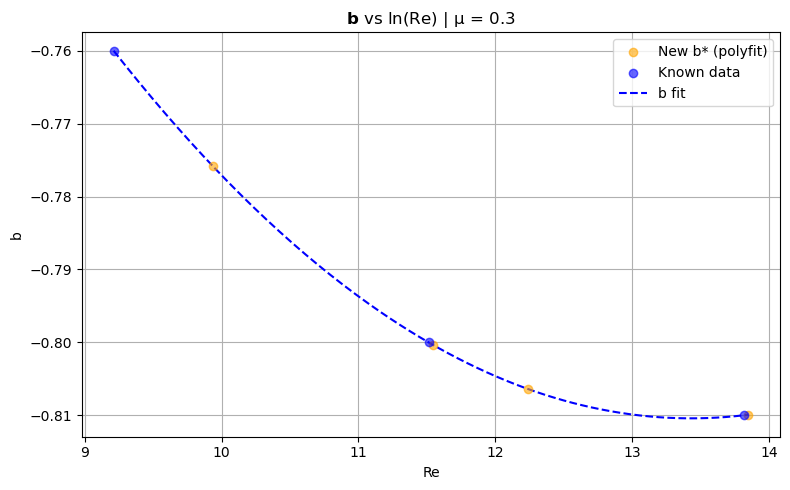

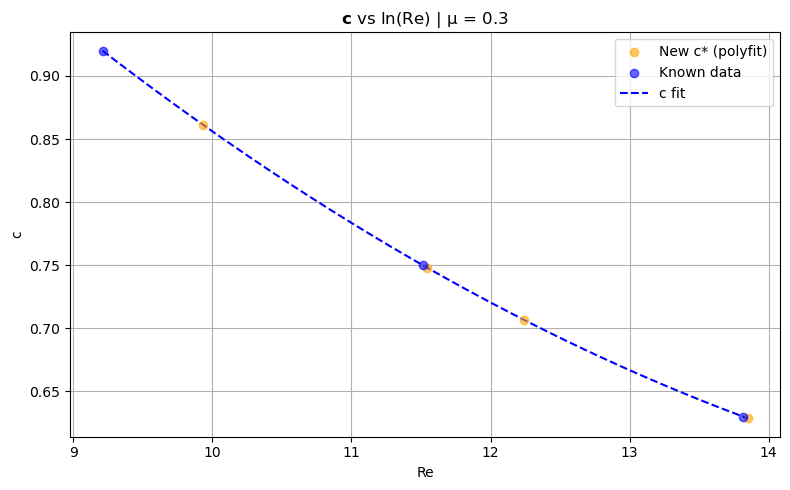

(['At μ_index=2 (μ≈0.3), Re=206909.35666626558: b = -0.8064 ± 0.0000', 'At μ_index=2 (μ≈0.3), Re=1034648.5104145535: b = -0.8099 ± 0.0000', 'At μ_index=2 (μ≈0.3), Re=20665.46649279972: b = -0.7758 ± 0.0000', 'At μ_index=2 (μ≈0.3), Re=103441.71997253466: b = -0.8004 ± 0.0000'], ['At μ_index=2 (μ≈0.3), Re=206909.35666626558: c = 0.7067 ± 0.0000', 'At μ_index=2 (μ≈0.3), Re=1034648.5104145535: c = 0.6286 ± 0.0000', 'At μ_index=2 (μ≈0.3), Re=20665.46649279972: c = 0.8610 ± 0.0000', 'At μ_index=2 (μ≈0.3), Re=103441.71997253466: c = 0.7479 ± 0.0000'])


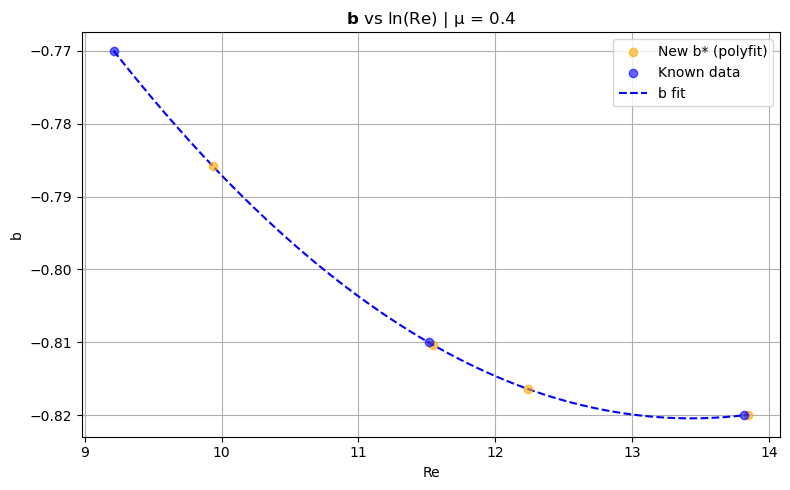

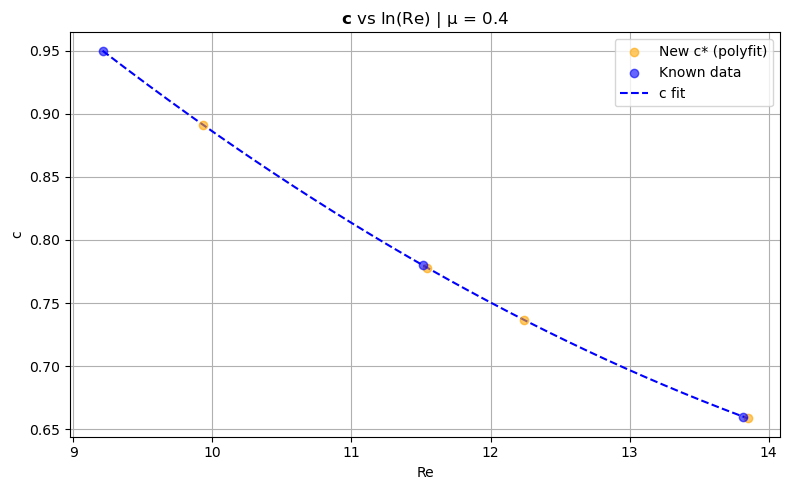

(['At μ_index=3 (μ≈0.4), Re=206909.35666626558: b = -0.8164 ± 0.0000', 'At μ_index=3 (μ≈0.4), Re=1034648.5104145535: b = -0.8199 ± 0.0000', 'At μ_index=3 (μ≈0.4), Re=20665.46649279972: b = -0.7858 ± 0.0000', 'At μ_index=3 (μ≈0.4), Re=103441.71997253466: b = -0.8104 ± 0.0000'], ['At μ_index=3 (μ≈0.4), Re=206909.35666626558: c = 0.7367 ± 0.0000', 'At μ_index=3 (μ≈0.4), Re=1034648.5104145535: c = 0.6586 ± 0.0000', 'At μ_index=3 (μ≈0.4), Re=20665.46649279972: c = 0.8910 ± 0.0000', 'At μ_index=3 (μ≈0.4), Re=103441.71997253466: c = 0.7779 ± 0.0000'])


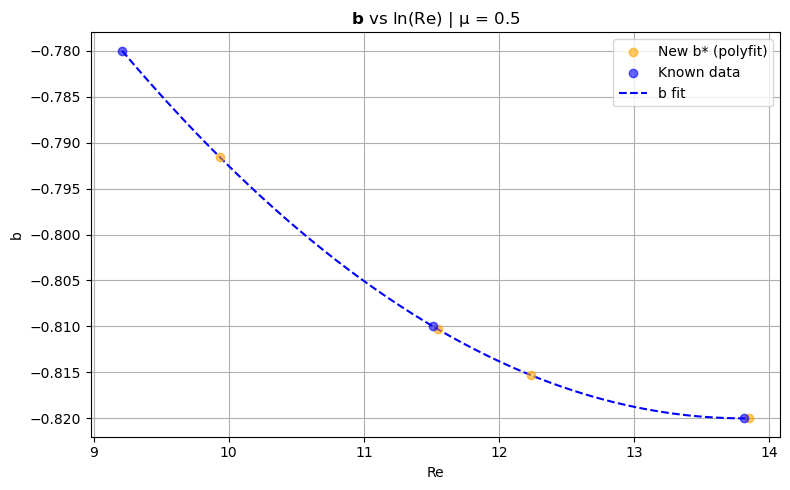

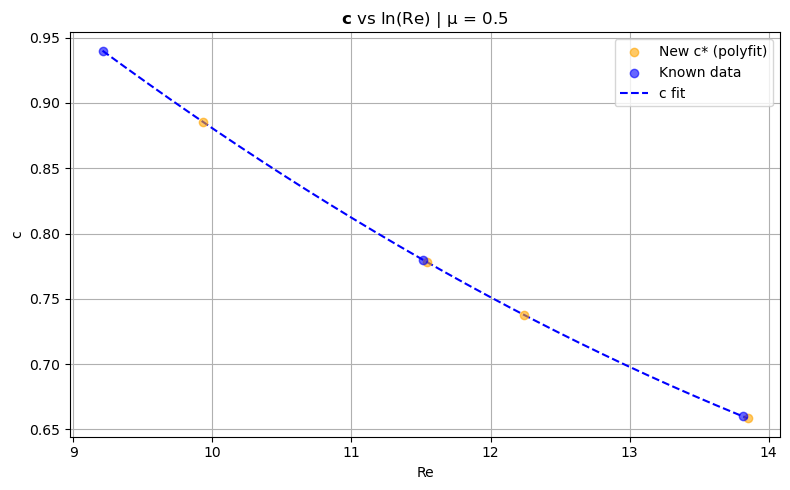

(['At μ_index=4 (μ≈0.5), Re=206909.35666626558: b = -0.8153 ± 0.0000', 'At μ_index=4 (μ≈0.5), Re=1034648.5104145535: b = -0.8200 ± 0.0000', 'At μ_index=4 (μ≈0.5), Re=20665.46649279972: b = -0.7916 ± 0.0000', 'At μ_index=4 (μ≈0.5), Re=103441.71997253466: b = -0.8103 ± 0.0000'], ['At μ_index=4 (μ≈0.5), Re=206909.35666626558: c = 0.7378 ± 0.0000', 'At μ_index=4 (μ≈0.5), Re=1034648.5104145535: c = 0.6585 ± 0.0000', 'At μ_index=4 (μ≈0.5), Re=20665.46649279972: c = 0.8852 ± 0.0000', 'At μ_index=4 (μ≈0.5), Re=103441.71997253466: c = 0.7779 ± 0.0000'])


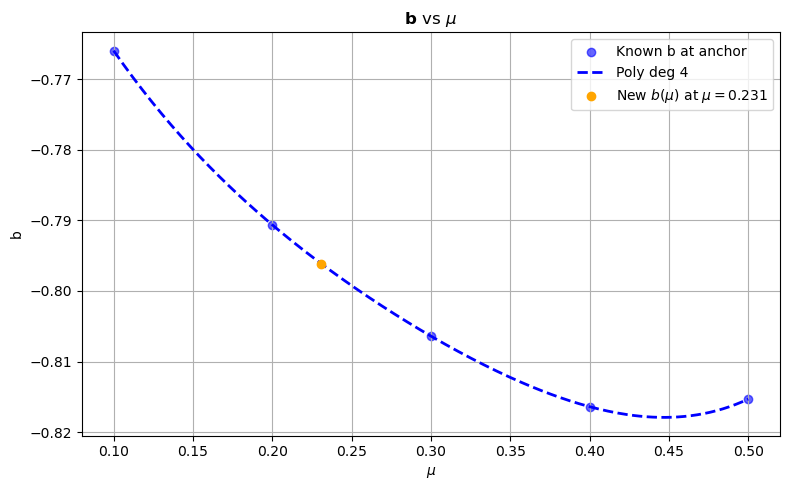

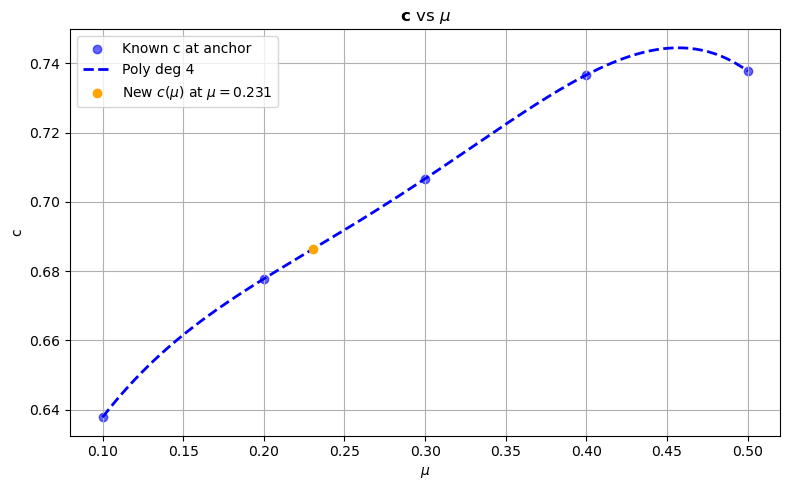

(['Computed μ from masses: μ = 0.2308  →  b(μ) = -0.7962 ± 0.0000 for Re = 1e+04)'], ['Computed μ from masses: μ = 0.2308  →  c(μ) = 0.6868 ± 0.0000 for Re = 1e+04)'])


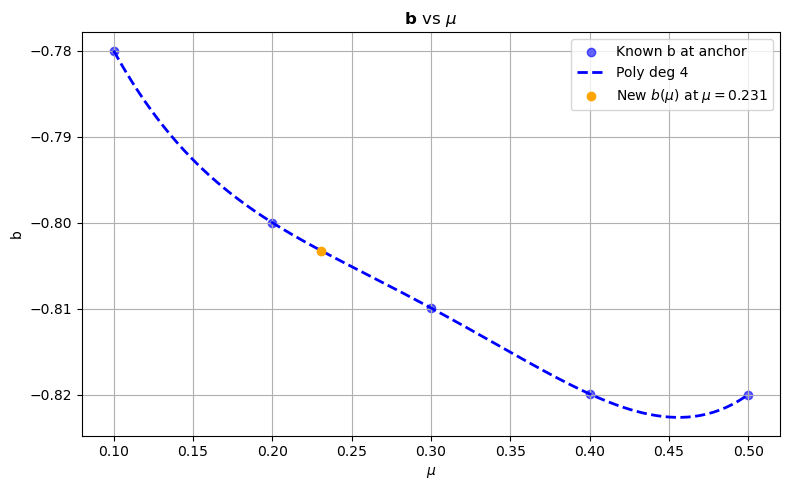

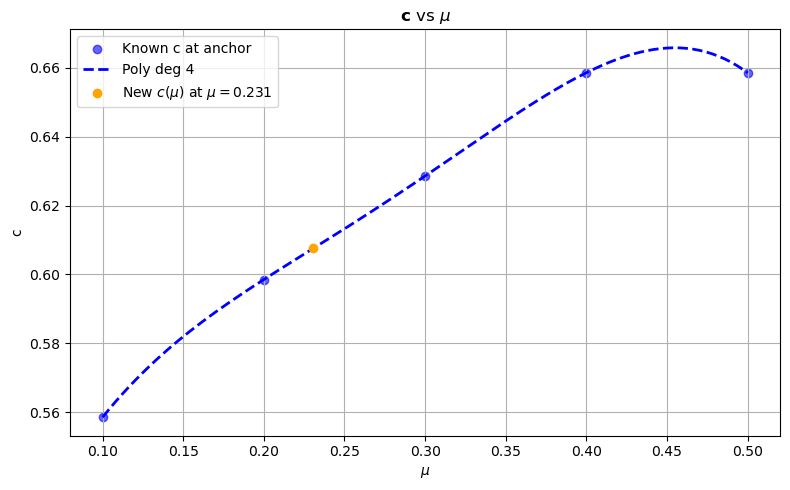

(['Computed μ from masses: μ = 0.2308  →  b(μ) = -0.8034 ± 0.0000 for Re = 1e+05)'], ['Computed μ from masses: μ = 0.2308  →  c(μ) = 0.6079 ± 0.0000 for Re = 1e+05)'])


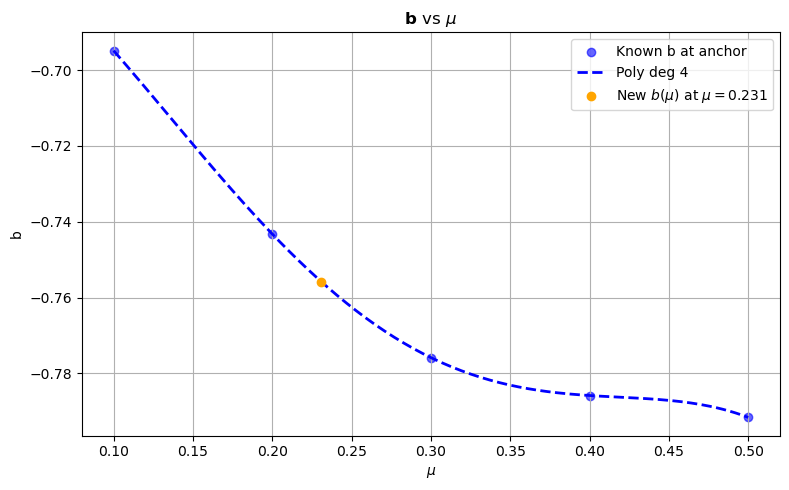

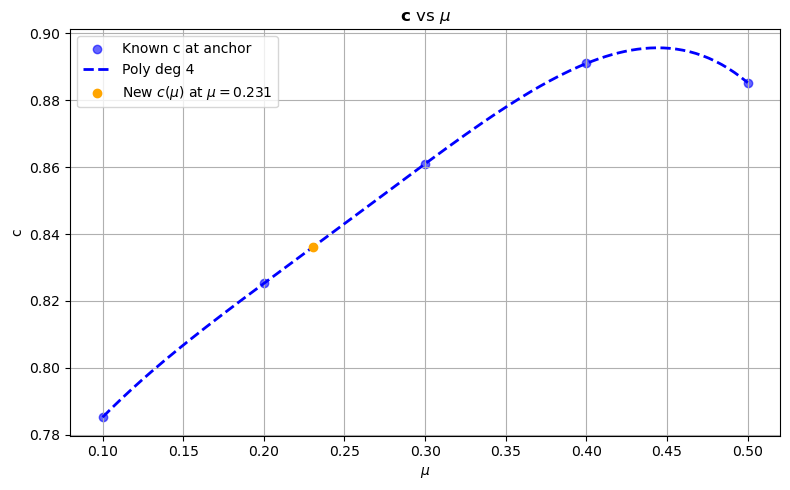

(['Computed μ from masses: μ = 0.2308  →  b(μ) = -0.7556 ± 0.0000 for Re = 1e+06)'], ['Computed μ from masses: μ = 0.2308  →  c(μ) = 0.8364 ± 0.0000 for Re = 1e+06)'])


In [13]:
AC.find_and_plot_new_bc_points_re_and_mu(b, c,index[0],Re,Re_fit=True, Mu_fit=False,plotting=True)
print(AC.show_me_new_points(b, c, index[0], Re, M1=1.0, M2=0.3,print_mu=False, print_Re=True))

AC.find_and_plot_new_bc_points_re_and_mu(b, c,index[1],Re,Re_fit=True, Mu_fit=False,plotting=True)
print(AC.show_me_new_points(b, c, index[1], Re, M1=1.0, M2=0.3,print_mu=False, print_Re=True))

AC.find_and_plot_new_bc_points_re_and_mu(b, c,index[2],Re,Re_fit=True, Mu_fit=False,plotting=True)
print(AC.show_me_new_points(b, c, index[2], Re, M1=1.0, M2=0.3,print_mu=False, print_Re=True))

AC.find_and_plot_new_bc_points_re_and_mu(b, c,index[3],Re,Re_fit=True, Mu_fit=False,plotting=True)
print(AC.show_me_new_points(b, c, index[3], Re, M1=1.0, M2=0.3,print_mu=False, print_Re=True))

AC.find_and_plot_new_bc_points_re_and_mu(b, c,index[4],Re,Re_fit=True, Mu_fit=False,plotting=True)
print(AC.show_me_new_points(b, c, index[4], Re, M1=1.0, M2=0.3,print_mu=False, print_Re=True))

AC.find_and_plot_new_bc_points_re_and_mu(b, c,mu_indices=[0,1,2,3,4],R_targets=Re,Re_fit=False, Mu_fit=True,M1=1.0, M2=0.3,re_idx=0, deg_mu=4,plotting=True)
print(AC.show_me_new_points(b, c, index, Re, M1=1.0, M2=0.3,print_mu=True, re_idx=0, print_Re=False))

AC.find_and_plot_new_bc_points_re_and_mu(b, c,mu_indices=[0,1,2,3,4],R_targets=Re,Re_fit=False, Mu_fit=True,M1=1.0, M2=0.3,re_idx=1, deg_mu=4,plotting=True)
print(AC.show_me_new_points(b, c, index, Re, M1=1.0, M2=0.3,print_mu=True, re_idx=1, print_Re=False))

AC.find_and_plot_new_bc_points_re_and_mu(b, c,mu_indices=[0,1,2,3,4],R_targets=Re,Re_fit=False, Mu_fit=True,M1=1.0, M2=0.3,re_idx=2, deg_mu=4,plotting=True)
print(AC.show_me_new_points(b, c, index, Re, M1=1.0, M2=0.3,print_mu=True, re_idx=2, print_Re=False))

$R_{trunc} (M1, M2, e, a) = R_{egg,i}*(b*e^{c} + 0.88*\mu^{0.01}) $

the truncation radius for a given mu = 0.41420118343195267 and given Reynolds number Re = 10000.0 is [1.14437995]


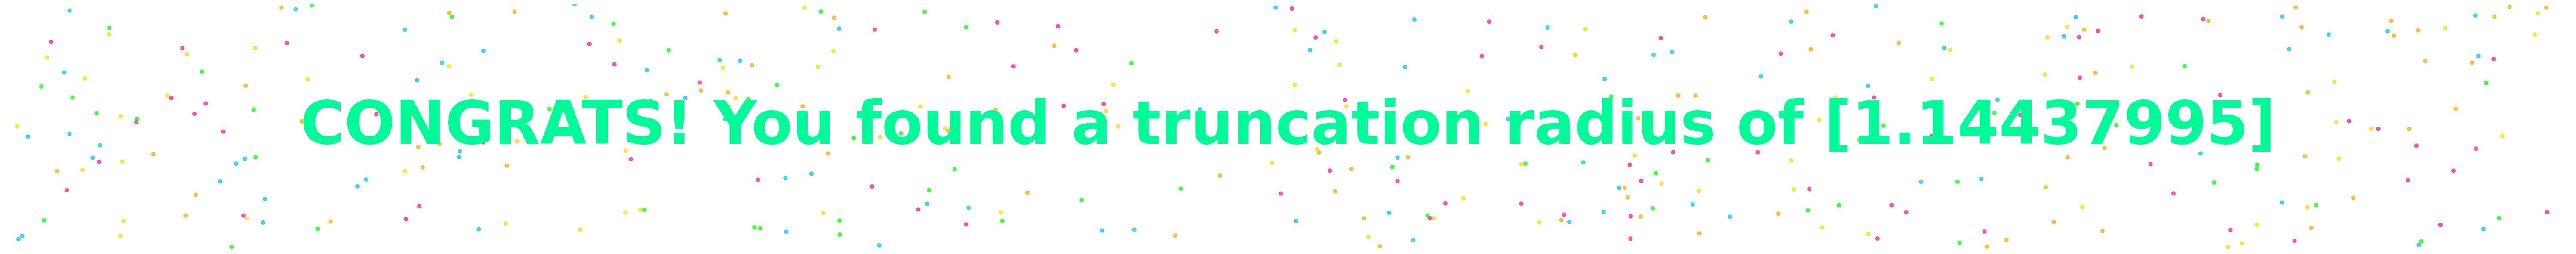

array([1.14437995])

In [14]:
df = pd.read_csv("C:\\Users\\casey\\UnigeMasters\\Astrophysics_Lab_Disc_Truncation\\Databases\\C1.csv", header=[0,1,2])

alpha = [5e-4, 1e-4, 5e-3, 1e-3]
aspect_ratio = [aspect_ratio_5e4, aspect_ratio_1e4, aspect_ratio_5e3, aspect_ratio_1e3]
known_mu = [0.1, 0.2, 0.3, 0.4, 0.5]

M1=.99 # Mass of star 1 in solar masses
M2=.7 # Mass of Star 2 in solar masses
e=.31 # Eccentricity of system
abin=5.3 # Semi-major Axis of system
Re = AC.Reynolds(alpha, aspect_ratio) # Target Reynolds numbers calculated from given alpha and aspect ratio

b = [] # values of b from table
c = [] # values of c from table
R = df['Circumprimary']['0.1']['R']
for ii in range(len(known_mu)):
    bs = df['Circumprimary'][str(known_mu[ii])]['b']
    cs = df['Circumprimary'][str(known_mu[ii])]['c']
    b.append(bs)
    c.append(cs)
    

AC.truncation_radius(M1,M2,e,abin,b,c,Re, re_idx=0, plotting=True)

In [ ]:
# Print both radius around primary and radius around the secondary
# give alpha as an input for the truncation radius function
# Dependencae of truncation on the mass ratio, same with other parameters as well